### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

### Data preprocessing

In [2]:
# import train and test data now seperated 
path_train = ('/Users/c/Desktop/End of module/Final/df_train_randomforest.csv')
path_test = ('/Users/c/Desktop/End of module/Final/df_test_randomforest.csv')
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [3]:
# saving the labels for the confusion matrix

df_train_labels = df_train['Pollutant']

df_test_labels = df_test['Pollutant']

In [4]:
#Transforming dataset
def scaling_func(df):
    le = LabelEncoder()
    df['Pollutant'] = le.fit_transform(df['Pollutant'])

    scaler = MinMaxScaler()
    df[['Motorcycle', 'Taxi', 'Car', 'BusAndCoach', 'Lgv', 'Rigid', 'Artic',
                    'Rigid2Axle', 'Rigid3Axle', 'Rigid4Axle', 'Artic3Axle', 'Artic5Axle',
                    'Artic6Axle', 'PetrolCar', 'DieselCar', 'PetrolLgv', 'DieselLgv',
                    'LtBus', 'Coach', 'ElectricCar', 'ElectricLgv']] = scaler.fit_transform(df[['Motorcycle', 'Taxi', 'Car', 'BusAndCoach', 'Lgv', 'Rigid', 'Artic',
                    'Rigid2Axle', 'Rigid3Axle', 'Rigid4Axle', 'Artic3Axle', 'Artic5Axle',
                    'Artic6Axle', 'PetrolCar', 'DieselCar', 'PetrolLgv', 'DieselLgv',
                    'LtBus', 'Coach', 'ElectricCar', 'ElectricLgv']])
                    
    return df

df_train = scaling_func(df_train)
df_test = scaling_func(df_test)

### Training and Fitting Model

In [5]:
# Split data of the training sample into features and target
X_train = df_train.drop(['Pollutant'], axis=1)
y_train = df_train['Pollutant']

# Split data of the test sample into features and target
X_test = df_test.drop(['Pollutant'], axis=1)
y_test = df_test['Pollutant']

In [6]:
# Training model
# Create the parameter grid based on the results of random search
param_grid = {
    'n_estimators': [100],        # Number of trees in the forest
    'max_depth': [None],#, 5, 10, 15],        # Maximum depth of the trees
    'min_samples_split': [2],#, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1],#, 2, 4],         # Minimum samples required at each leaf node
    'max_features': ['sqrt']#, 'log2'] # Number of features to consider
}

# Create a based model
rf = RandomForestClassifier(random_state=42)

# Grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=2, n_jobs = -1, verbose = 2, scoring='accuracy')

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.2min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.2min


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100]},
             scoring='accuracy', verbose=2)

### Model Evaluation

Importing report libraries

In [28]:
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Spacer, Paragraph
from reportlab.lib.styles import getSampleStyleSheet
from sklearn.metrics import accuracy_score

In [7]:
#Accuracy from Grid_Search model
print("Best accuracy:", grid_search.best_score_*100)

Best accuracy: 99.28239676533343


In [8]:
# Testing classifier on testing data
y_pred = grid_search.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy for our testing dataset is: {:.2f}%".format(test_accuracy))

Accuracy for our testing dataset is: 91.50%


Exporting accuracy report

In [27]:
# Create PDF 
pdf_file = "accuracy_report.pdf"
doc = SimpleDocTemplate(pdf_file, pagesize=letter)

# Fitting data for the accuracy report
accuracy_data = [
    ["Best Accuracy (Grid Search)", f"{grid_search.best_score_ * 100:.2f}%"],
    ["Accuracy for Testing Dataset", f"{test_accuracy:.2f}%"]
]

# Create a table from the accuracy data
table = Table(accuracy_data, colWidths=[200, 100])

# Defining table style
style = TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    ('GRID', (0, 0), (-1, -1), 1, colors.black)
])
table.setStyle(style)

# Building the PDF document
elements = []
styles = getSampleStyleSheet()
elements.append(Paragraph("Accuracy Report", styles['Title']))
elements.append(Spacer(1, 24))
elements.append(table)
doc.build(elements)
print(f"Accuracy report saved as {pdf_file}")

Accuracy report saved as accuracy_report.pdf


### Confusion Matrix

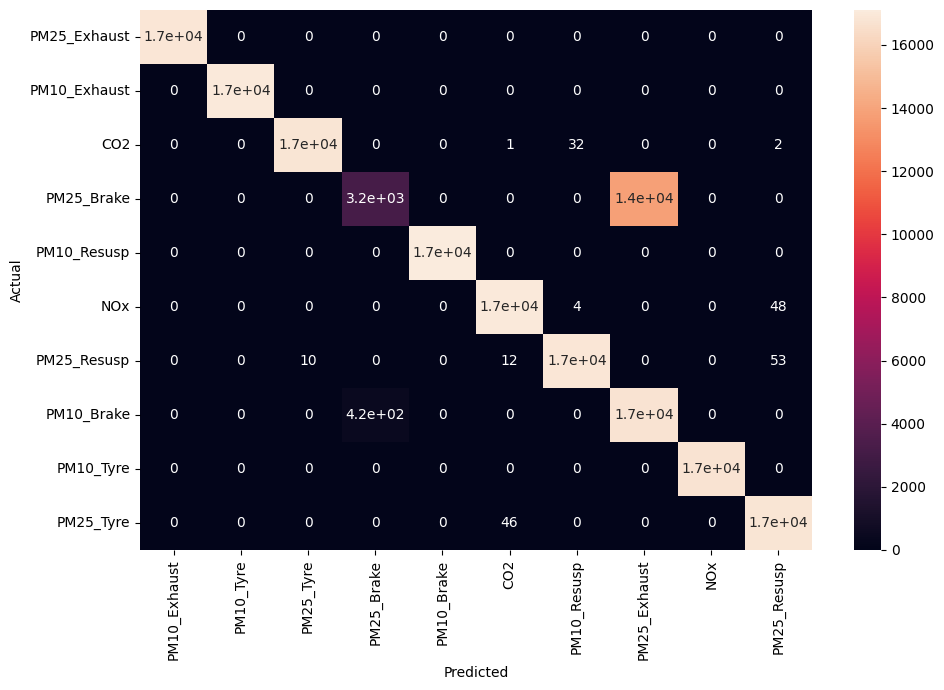

In [22]:
#Plotting confusion matrix 
y_pred=grid_search.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=df_test_labels.unique(), columns=df_train_labels.unique())
plt.figure(figsize=(10,7))
sn.heatmap(cm_df, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Exporting plot
plt.tight_layout()
plt.savefig('Confusion Matrix.pdf')

### Classification Report

In [10]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16857
           1       1.00      1.00      1.00     17029
           2       1.00      1.00      1.00     16868
           3       0.88      0.19      0.31     17007
           4       1.00      1.00      1.00     17107
           5       1.00      1.00      1.00     17068
           6       1.00      1.00      1.00     16978
           7       0.55      0.98      0.70     17132
           8       1.00      1.00      1.00     16767
           9       0.99      1.00      1.00     16849

    accuracy                           0.91    169662
   macro avg       0.94      0.92      0.90    169662
weighted avg       0.94      0.91      0.90    169662



In [29]:
# Converting report into a list of lists/table format
report_data = []
for row in report.split('\n'):
    row_data = row.split()
    if row_data:
        report_data.append(row_data)

# Creating PDF 
pdf_file = "Classification_Report.pdf"
doc = SimpleDocTemplate(pdf_file, pagesize=letter)

# Create a table from the classification report data
table = Table(report_data)

# Definding table style
style = TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    ('GRID', (0, 0), (-1, -1), 1, colors.black)
])

table.setStyle(style)

# Building the PDF document
elements = [table]
doc.build(elements)
print(f"Classification report saved as {pdf_file}")

Classification report saved as Classification_Report.pdf


### Feature Importances

Feature Importances:
Motorcycle     0.059239
Taxi           0.026400
Car            0.026385
BusAndCoach    0.041733
Lgv            0.018240
Rigid          0.024214
Artic          0.014387
Rigid2Axle     0.047513
Rigid3Axle     0.059269
Rigid4Axle     0.026577
Artic3Axle     0.039522
Artic5Axle     0.019225
Artic6Axle     0.019341
PetrolCar      0.022806
DieselCar      0.036518
PetrolLgv      0.045367
DieselLgv      0.025047
LtBus          0.060382
Coach          0.077455
ElectricCar    0.157492
ElectricLgv    0.152887
dtype: float64


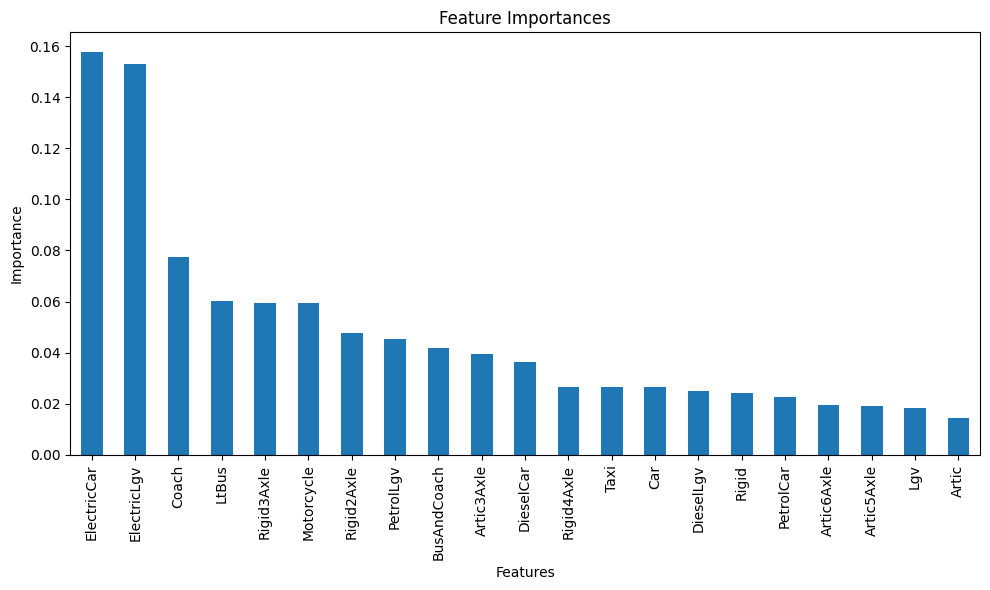

In [21]:
best_rf_model = grid_search.best_estimator_

# Access feature importances for the best model
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)
print("Feature Importances:")
print(feature_importances)

# Plotting feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')

#Exporting plot
plt.tight_layout()
plt.savefig('feature_importances.pdf')
plt.show()